In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import seaborn as sns

C:\Users\aaa\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\aaa\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\aaa\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 6.2.1 聚合函数

### 前面的例子中使用了部分聚合运算方法，如mean、count和sum函数

### 注意：空值不参与计算

### 然后通过性别分组，计算小费的最大值

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
max_tip = tips.groupby('sex')['tip'].max()
max_tip

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

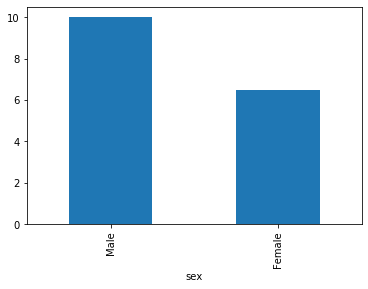

In [5]:
max_tip.plot(kind='bar')

### 其实，除了上述聚合运算方法外，只要是Series或DataFrame支持的能用于分组的运算函数都可以拿来使用

In [6]:
df = DataFrame(np.arange(16).reshape(4,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [8]:
list1 = ['a','b','a','b']
df.groupby(list1).quantile(0.5)

,0,1,2,3
a,4.0,5.0,6.0,7.0
b,8.0,9.0,10.0,11.0


### 对于更加复杂的聚合运算，可以自定义聚合函数，通过aggregate或agg参数传入即可。例如，通过性别分类，计算小费最大值与最小值的差（极差）

In [9]:
def get_range(x):
    return x.max()-x.min()

In [10]:
tips_range = tips.groupby('sex')['tip'].agg(get_range)
tips_range

sex
Male      9.0
Female    5.5
Name: tip, dtype: float64

### 男性（Male）的小费极差比女性（Female）大很多，说明在小费给予中，男性的差异较大，主观性更大。

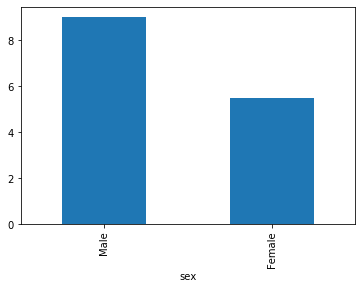

In [12]:
tips_range.plot(kind = 'bar')

## 6.2.2 多函数应用

### 对agg参数传入多函数列表，即可完成一列的多函数运算。

In [13]:
tips.groupby(['sex','smoker'])['tip'].agg(['mean','std',get_range])

mean       std  get_range
sex    smoker                               
Male   Yes     3.051167  1.500120       9.00
       No      3.113402  1.489559       7.75
Female Yes     2.931515  1.219916       5.50
       No      2.773519  1.128425       4.20

### 如果不想使用默认的运算函数列名，可以元组的形式传入，前面为名称，后面为聚合函数

In [14]:
tips.groupby(['sex','smoker'])['tip'].agg([('tip_mean','mean'),('range',get_range)])

tip_mean  range
sex    smoker                 
Male   Yes     3.051167   9.00
       No      3.113402   7.75
Female Yes     2.931515   5.50
       No      2.773519   4.20

### 对多列进行多聚合函数运算时，会产生层次化索引

In [15]:
tips.groupby(['day','time'])['total_bill','tip'].agg([('tip_mean','mean'),('range',get_range)])

total_bill              tip      
              tip_mean  range  tip_mean range
day  time                                    
Thur Lunch   17.664754  35.60  2.767705  5.45
     Dinner  18.780000   0.00  3.000000  0.00
Fri  Lunch   12.845714   7.69  2.382857  1.90
     Dinner  19.663333  34.42  2.940000  3.73
Sat  Lunch         NaN    NaN       NaN   NaN
     Dinner  20.441379  47.74  2.993103  9.00
Sun  Lunch         NaN    NaN       NaN   NaN
     Dinner  21.410000  40.92  3.255132  5.49

### 如果需要对不同列使用不同的函数运算，可以通过字典来定义映射关系

In [16]:
tips.groupby(['day','time'])['total_bill','tip'].agg({'total_bill':'sum','tip':'mean'})

total_bill       tip
day  time                        
Thur Lunch      1077.55  2.767705
     Dinner       18.78  3.000000
Fri  Lunch        89.92  2.382857
     Dinner      235.96  2.940000
Sat  Lunch          NaN       NaN
     Dinner     1778.40  2.993103
Sun  Lunch          NaN       NaN
     Dinner     1627.16  3.255132

In [17]:
tips.groupby(['day','time'])['total_bill','tip'].agg({'total_bill':['sum','mean'],'tip':'mean'})

total_bill                  tip
                   sum       mean      mean
day  time                                  
Thur Lunch     1077.55  17.664754  2.767705
     Dinner      18.78  18.780000  3.000000
Fri  Lunch       89.92  12.845714  2.382857
     Dinner     235.96  19.663333  2.940000
Sat  Lunch         NaN        NaN       NaN
     Dinner    1778.40  20.441379  2.993103
Sun  Lunch         NaN        NaN       NaN
     Dinner    1627.16  21.410000  3.255132

### 如果希望返回的结果不以分组键为索引，通过as_index=False可以完成

In [21]:
no_index = tips.groupby(['sex','smoker'],as_index=False)['tip'].mean()
no_index

,sex,smoker,tip
0,Male,Yes,3.051167
1,Male,No,3.113402
2,Female,Yes,2.931515
3,Female,No,2.773519
